# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR = '/home/shiv/Documents/DataScience/Capstone/Data/wide_deep/Electronics/'
DATA_DIR_SLIREC = '/home/shiv/Documents/DataScience/Capstone/Data/slirec/Electronics/'

ratings_df = pd.read_csv(DATA_DIR + 'wide_deep_amzn_e_20.csv', header=None, low_memory=False)
ratings_df.columns=['userID','itemID', 'rating','genre','unixTimeStamp','title','price','main_cat','category']

## Histogram of items for all categories

In [2]:
from collections import defaultdict
genre_count = defaultdict(int)
for _,row in ratings_df.iterrows():
    genres = row['genre'].split('|')
    for genre in genres:
        genre_count[genre] += 1

In [3]:
df = pd.DataFrame(genre_count, index=[0])
df = df.T
df.reset_index(inplace=True)
df.columns=['Category','Count']
df.sort_values('Category', inplace=True)

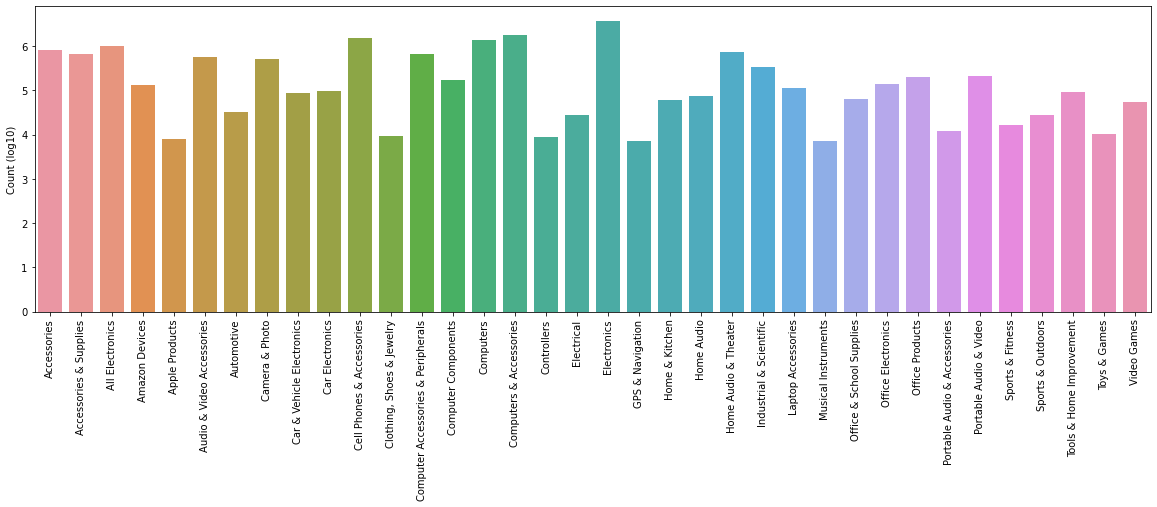

In [4]:
f = plt.figure(figsize=(20,8))
g = sns.barplot(x=df['Category'], y=np.log10(df['Count']))
g.set_xlabel('')
g.set_ylabel('Count (log10)')
plt.gcf().subplots_adjust(bottom=0.35)
plt.setp(g.get_xticklabels(), rotation=90);
# plt.savefig('/home/shiv/Downloads/item_dist.png',facecolor ='white')

## Histogram of items for only the main category

In [5]:
genre_count = defaultdict(int)
for _,row in ratings_df.iterrows():
    genres = row['genre'].split('|')
    genre_count[genres[0]] += 1 # main category only
    
df = pd.DataFrame(genre_count, index=[0])
df = df.T

df.reset_index(inplace=True)
df.columns=['Category','Count']
df.sort_values('Category', inplace=True)

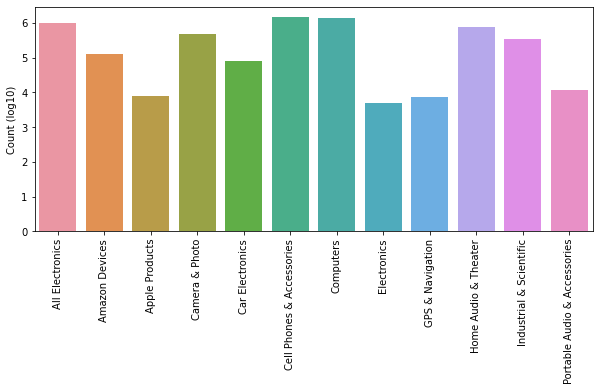

In [6]:
f = plt.figure(figsize=(10,6))
g = sns.barplot(x=df['Category'], y=np.log10(df['Count']))
g.set_xlabel('')
g.set_ylabel('Count (log10)')
plt.gcf().subplots_adjust(bottom=0.36)
plt.setp(g.get_xticklabels(), rotation=90);
# f.savefig('/home/shiv/Downloads/item_dist_main.png', facecolor='white')

## User with the most reviews

In [7]:
data_grp = ratings_df[['userID', 'itemID']].groupby('userID', as_index=False).count()
data_grp.sort_values('itemID', ascending=False, inplace=True)
data_grp.head(5)

,userID,itemID
8009,8009,324
2347,2347,243
35258,35258,238
1522,1522,236
63007,63007,232


In [8]:
user_df = ratings_df[ratings_df['userID'] == 8009]
user_df=user_df[['rating', 'unixTimeStamp', 'title', 'main_cat', 'genre']]
user_df.sort_values('unixTimeStamp', ascending=False, inplace=True)
user_df['date'] = pd.to_datetime(user_df['unixTimeStamp'], unit='s')
# user_df.drop(columns=['unixTimeStamp'], inplace=True)
# user_df.sort_values('date', ascending=False, inplace=True)

## Multiple reviews at the same time!

In [9]:
user_df.head(10) # How can one user review so many items at the same time?

,rating,unixTimeStamp,title,main_cat,genre,date
1736181,5.0,1521936000,BlueRigger High Speed MicroBlueRigger High Spe...,Home Audio & Theater,Home Audio & Theater|Electronics|Accessories &...,2018-03-25
1535845,5.0,1521936000,Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chan...,All Electronics,All Electronics|Electronics|Computers & Access...,2018-03-25
626172,5.0,1521936000,D-Link 8 Port 10/100 Unmanaged Metal Desktop S...,All Electronics,All Electronics|Electronics|Computers & Access...,2018-03-25
3656880,5.0,1521936000,"New iPad 9.7"" (2018 & 2017) / iPad Pro 9.7 / i...",Computers,Computers|Electronics|Computers & Accessories,2018-03-25
484629,5.0,1521936000,StarTech.com CABSHELF Black Standard Universal...,Computers,Computers|Electronics|Computers & Accessories,2018-03-25
2854137,5.0,1521936000,ESYNIC DAC Digital to Analog Audio Converter O...,All Electronics,All Electronics|Electronics|Accessories & Supp...,2018-03-25
5472304,5.0,1520899200,HP Laserjet Pro M402dw Wireless Monochrome Pri...,All Electronics,All Electronics|Office Products|Office Electro...,2018-03-13
3955334,4.0,1520899200,VCE 4K x 2K Mini HDMI Male to HDMI Female Conv...,All Electronics,All Electronics|Electronics|Accessories & Supp...,2018-03-13
3676164,5.0,1520899200,Timetec Hynix IC 4GB DDR3L 1600MHz PC3L-12800 ...,Computers,Computers|Electronics|Computers & Accessories|...,2018-03-13
420370,4.0,1504828800,VIVO Universal LCD LED Flat Screen TV Table To...,Home Audio & Theater,Home Audio & Theater|Home & Kitchen,2017-09-08


## Bar plot of count of reviews in each category and averge rating

In [10]:
genre_count = defaultdict(int)
genre_rating = defaultdict(float)
for _,row in user_df.iterrows():
    genres = row['genre'].split('|')
    for genre in genres:
        genre_count[genre] += 1
        genre_rating[genre] += row['rating']

for k in genre_rating.keys():
    genre_rating[k] = round(genre_rating[k]/genre_count[k],2)

count_dict = {v[0]: v[1] for v in sorted(genre_count.items(), key=lambda x: (x[1],x[0]), reverse=True)}
rating_dict = {v[0]: genre_rating[v[0]] for v in sorted(genre_count.items(), key=lambda x: (x[1],x[0]), reverse=True)}

In [11]:
df_tmp = pd.DataFrame(count_dict, index=[0]).T
df_tmp2 = pd.DataFrame(rating_dict, index=[0]).T
df_tmp = pd.concat([df_tmp, df_tmp2], axis=1)
df_tmp.columns=['count', 'avg rating']

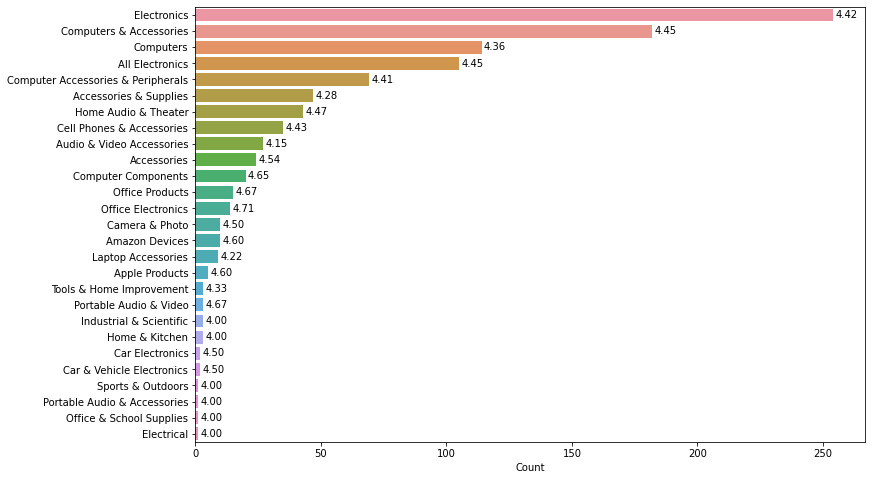

In [14]:
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(y=df_tmp.index.values, x=df_tmp['count'].values, orient='h')
ax.set(xlabel='Count')
for i, p in enumerate(ax.patches):
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(df_tmp.iloc[i]['avg rating']), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
f.savefig('/home/shiv/Downloads/hist_all_cat.png', facecolor='white')

## Bar plot of count of reviews in main category and averge rating

In [15]:
genre_count = defaultdict(int)
genre_rating = defaultdict(float)
for _,row in user_df.iterrows():
    genres = row['genre'].split('|')
    genre_count[genres[0]] += 1
    genre_rating[genres[0]] += row['rating']

for k in genre_rating.keys():
    genre_rating[k] = round(genre_rating[k]/genre_count[k],2)

count_dict = {v[0]: v[1] for v in sorted(genre_count.items(), key=lambda x: (x[1],x[0]), reverse=True)}
rating_dict = {v[0]: genre_rating[v[0]] for v in sorted(genre_count.items(), key=lambda x: (x[1],x[0]), reverse=True)}

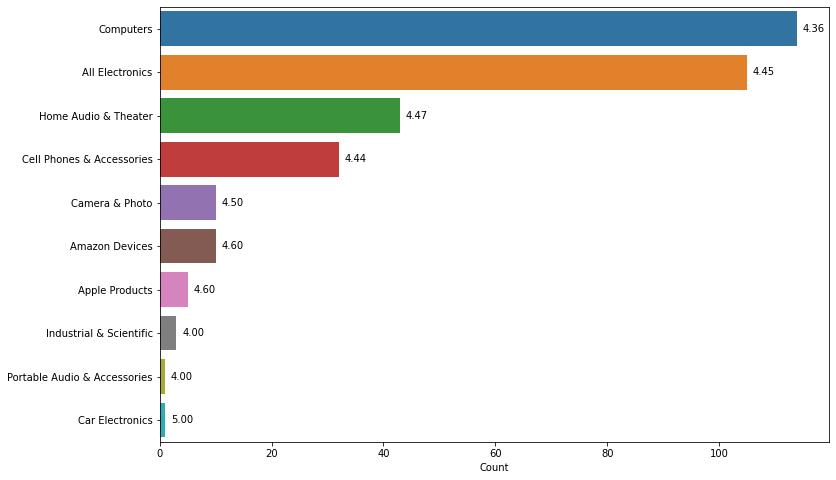

In [16]:
df_tmp = pd.DataFrame(count_dict, index=[0]).T
df_tmp2 = pd.DataFrame(rating_dict, index=[0]).T
df_tmp = pd.concat([df_tmp, df_tmp2], axis=1)
df_tmp.columns=['count', 'avg rating']

f, ax = plt.subplots(figsize=(12, 8))
ax.set(xlabel='Count')
sns.barplot(y=df_tmp.index.values, x=df_tmp['count'].values, orient='h')
for i, p in enumerate(ax.patches):
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(df_tmp.iloc[i]['avg rating']), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
f.savefig('/home/shiv/Downloads/hist_main_cat.png', facecolor='white')